![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/05_Cluster%20Analysis%20con%20k-Means/05_clustering-kmeans_session_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 05 | Cluster Analysis with k-Means

## Machine Learning Review

- **Supervised Learning:**
    - Regression → Predicting a Numerical Variable
    - Classification → Predicting a Categorical Variable


- **Unsupervised Learning:**
    - Cluster Analysis → Groups based on Explanatory Variables

In [25]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Load the Data

- Simply execute the following lines of code to load the data.
- This dataset contains **statistics about Car Accidents** (columns)
- In each one of **USA States** (rows)

https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/

In [8]:
import seaborn as sns #!
import pandas as pd

pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 10)

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')[['alcohol', 'ins_losses']]
df_crashes.sample(5)

,alcohol,ins_losses
abbrev,,
CT,3.888,167.02
AZ,5.208,110.35
...,...,...
FL,5.191,144.18
ND,10.038,109.72


## `KMeans()` Model in Python

### Fit the Model

- To cluster 3 groups

In [9]:
from sklearn.cluster import KMeans

In [10]:
model = KMeans(n_clusters=3)

In [12]:
model.fit()

TypeError: fit() missing 1 required positional argument: 'X'

In [13]:
model.fit(df_crashes)

KMeans(n_clusters=3)

### Calculate Predictions

In [15]:
model.predict(X=df_crashes)

array([2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 1, 1], dtype=int32)

### Create a New DataFrame for the Predictions

In [16]:
df_pred = df_crashes.copy()

In [17]:
df_pred['pred'] = model.predict(X=df_crashes)

In [18]:
df_pred

,alcohol,ins_losses,pred
abbrev,,,
AL,5.640,145.08,2
AK,4.525,133.93,2
...,...,...,...
WI,4.554,106.62,1
WY,5.568,122.04,1


### Visualize the Model

- You colour the points with the the value of the predictions

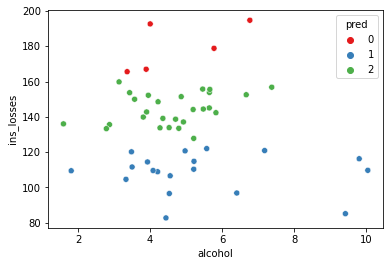

In [20]:
sns.scatterplot(x='alcohol', y='ins_losses', hue='pred',
                data=df_pred, palette='Set1');

### Model Interpretation

- [ ] Do you think the model **makes sense**?
- [ ] Which **variable is the most important** to determine the cluster?
- [ ] Why?

In [26]:
import matplotlib.pyplot as plt

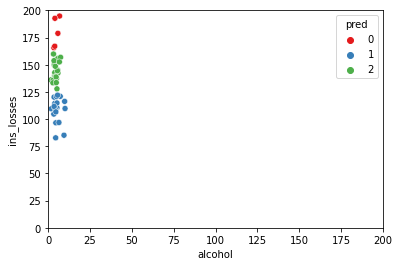

In [27]:
sns.scatterplot(x='alcohol', y='ins_losses', hue='pred',
                data=df_pred, palette='Set1')

plt.xlim(0, 200)
plt.ylim(0, 200);

In [28]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

- [ ] Is it necessary to **normalize the data** in the [`DecisionTreeClassifier()`](<../06 | Decision Tree. A Supervised Classification Model/06session.ipynb>) as it is in the `KMeans()`?

### Conclusion

- You need to `scale` the data
- Every time the algorithm computes `distances`
- Between `different variables`
- Because it's **not the same to increase 1kg of weight than 1m of height**

## `MinMaxScaler()` the data

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [32]:
datanorm = scaler.fit_transform(df_crashes)

In [33]:
pd.DataFrame(datanorm)

,0,1
0,0.479218,0.556369
1,0.347188,0.456842
...,...,...
49,0.350622,0.213068
50,0.470693,0.350710


In [34]:
df_norm = pd.DataFrame(datanorm,
                       columns=df_crashes.columns, 
                       index=df_crashes.index)

## `KMeans()` Model with *Scaled Data*

### Fit the Model

- To cluster 3 groups

In [35]:
model_norm = KMeans(n_clusters=3)

In [36]:
model_norm.fit(df_norm)

KMeans(n_clusters=3)

### Calculate Predictions

In [37]:
model_norm.predict(X=df_norm)

array([1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 1, 1,
       2, 2, 1, 2, 1, 2, 2], dtype=int32)

### Create a New DataFrame for the Predictions

In [40]:
df_pred['pred_norm'] = model_norm.predict(X=df_norm)

In [41]:
df_pred

,alcohol,ins_losses,pred,pred_norm
abbrev,,,,
AL,5.640,145.08,2,1
AK,4.525,133.93,2,2
...,...,...,...,...
WI,4.554,106.62,1,2
WY,5.568,122.04,1,2


### Visualize the Model

- You colour the points with the the value of the predictions

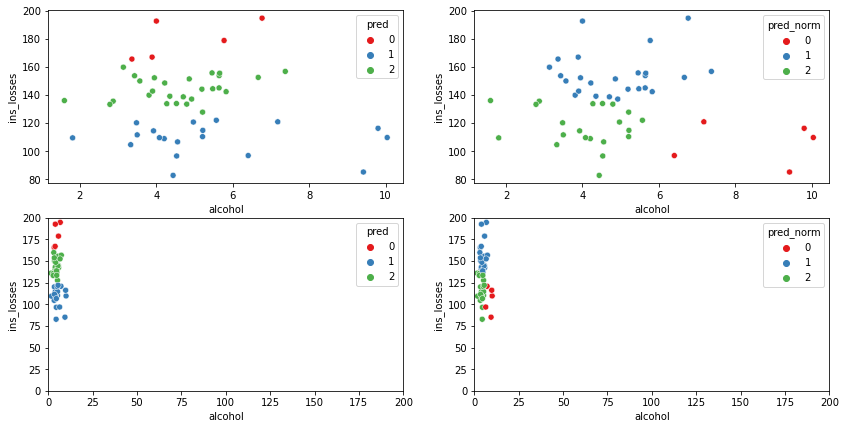

In [59]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 7))

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred',
                data=df_pred, palette='Set1', ax=ax1);

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_norm',
                data=df_pred, palette='Set1', ax=ax2);

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred',
                data=df_pred, palette='Set1', ax=ax3);

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_norm',
                data=df_pred, palette='Set1', ax=ax4);

ax3.set_xlim(0, 200)
ax3.set_ylim(0, 200)

ax4.set_xlim(0, 200)
ax4.set_ylim(0, 200);

### Model Interpretation

- [ ] Do you think the model **makes sense**?
- [ ] Which **variable is the most important** to determine the cluster?
- [ ] Why?

## Other `Clustering` Models in Python

> - Visit the `sklearn` website [here ↗](https://scikit-learn.org/stable/)
> - **Pick 2 new models** and compute the *Clustering*

### Other Model 1

#### Fit the Model

- To cluster 3 groups

In [60]:
from sklearn.cluster import AgglomerativeClustering

In [61]:
model_agg = AgglomerativeClustering(n_clusters=3)

In [62]:
model_agg.fit(df_norm)

AgglomerativeClustering(n_clusters=3)

#### Calculate Predictions

In [64]:
model_agg.fit_predict(X=df_norm)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1])

#### Create a New DataFrame for the Predictions

In [65]:
df_pred['pred_agg'] = model_agg.fit_predict(X=df_norm)

In [66]:
df_pred

,alcohol,ins_losses,pred,pred_norm,pred_agg
abbrev,,,,,
AL,5.640,145.08,2,1,0
AK,4.525,133.93,2,2,0
...,...,...,...,...,...
WI,4.554,106.62,1,2,1
WY,5.568,122.04,1,2,1


#### Visualize the Model

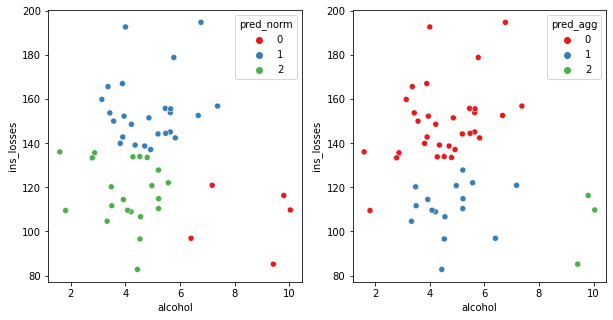

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_norm',
                data=df_pred, palette='Set1', ax=ax1);

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_agg',
                data=df_pred, palette='Set1', ax=ax2);

### Other Model 2

#### Fit the Model

- To cluster 3 groups

In [72]:
from sklearn.cluster import SpectralClustering

In [74]:
model_spt = SpectralClustering(n_clusters=3)

In [75]:
model_spt.fit(df_norm)

SpectralClustering(n_clusters=3)

#### Calculate Predictions

In [76]:
model_spt.fit_predict(X=df_norm)

array([0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2], dtype=int32)

#### Create a New DataFrame for the Predictions

In [77]:
df_pred['pred_spt'] = model_spt.fit_predict(X=df_norm)

In [78]:
df_pred

,alcohol,ins_losses,pred,pred_norm,pred_agg,pred_spt
abbrev,,,,,,
AL,5.640,145.08,2,1,0,1
AK,4.525,133.93,2,2,0,0
...,...,...,...,...,...,...
WI,4.554,106.62,1,2,1,0
WY,5.568,122.04,1,2,1,0


#### Visualize the Model

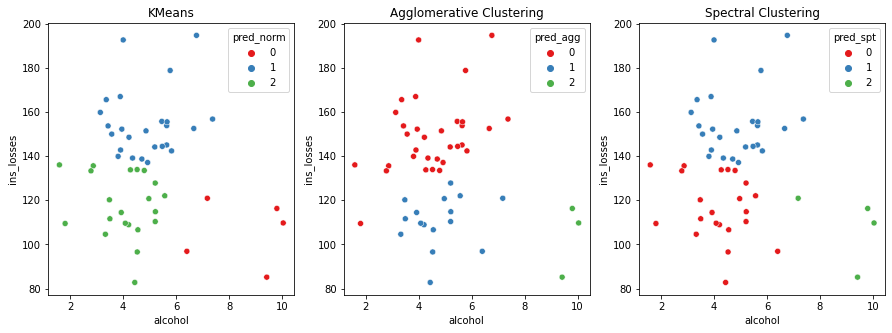

In [83]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_title('KMeans')
sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_norm',
                data=df_pred, palette='Set1', ax=ax1);

ax2.set_title('Agglomerative Clustering')
sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_agg',
                data=df_pred, palette='Set1', ax=ax2);

ax3.set_title('Spectral Clustering')
sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_spt',
                data=df_pred, palette='Set1', ax=ax3);

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.